In [226]:
# Objective: To identify predictors/characteristics of asthmatics patients
# Oversampling is done as dataset is imbalanced, only 5.18% of patients has asthma
# As dataset is Highly imbalanced AUC and F1 score is used to decide on the accuracy of the prediction model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/asthma_disease_data.csv')

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [5]:
# to check for missing values 
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [6]:
# to check for any duplicated values
duplicates = df[df.duplicated()]

In [7]:
# there are no duplicated values
duplicates

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge


In [8]:
# to check if data are in their correct data types, all variables are integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

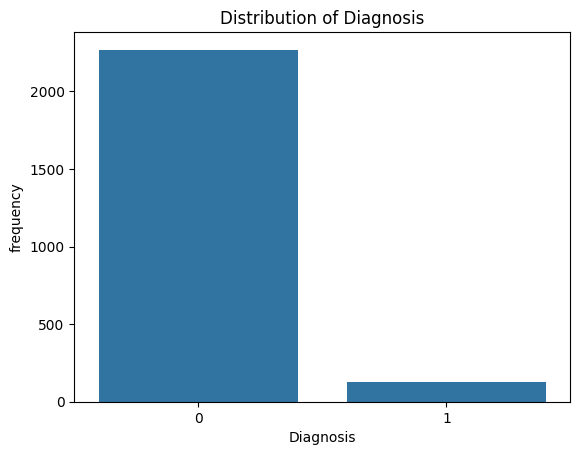

In [9]:
# to visualise the distribution of target variable
sns.countplot(data=df, x='Diagnosis')
plt.title('Distribution of Diagnosis')
plt.ylabel('frequency');
plt.show()

In [10]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [11]:
# 5% of the sample population is diagnosed with Asthma
100 *(df['Diagnosis'].value_counts()/len(df))

Diagnosis
0    94.816054
1     5.183946
Name: count, dtype: float64

In [12]:
df['EducationLevel'].unique()

array([0, 2, 1, 3], dtype=int64)

In [13]:
df['EducationLevel'] = df['EducationLevel'].map({0:'None', 1:'High_School', 2:'Bachelors', 3:'Higher_edu'})

In [14]:
df['EducationLevel'].unique()

array(['None', 'Bachelors', 'High_School', 'Higher_edu'], dtype=object)

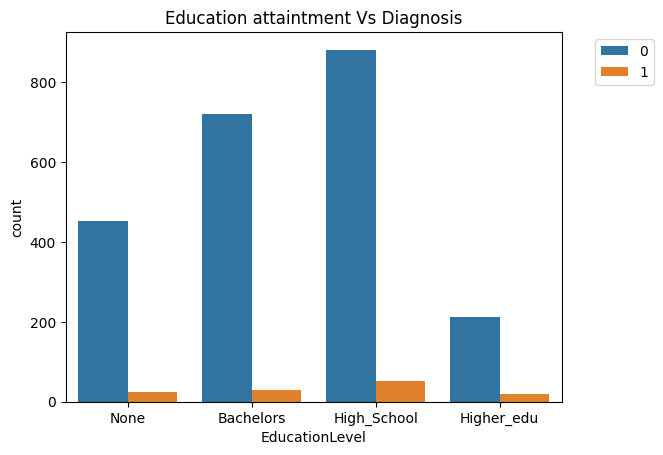

In [15]:
# people in with high school education are more likely to get asthma
sns.countplot(data=df, x= 'EducationLevel', hue='Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Education attaintment Vs Diagnosis')
plt.show()

In [16]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [17]:
df['Gender'] = df['Gender'].map({0:'Male', 1:'Female'})

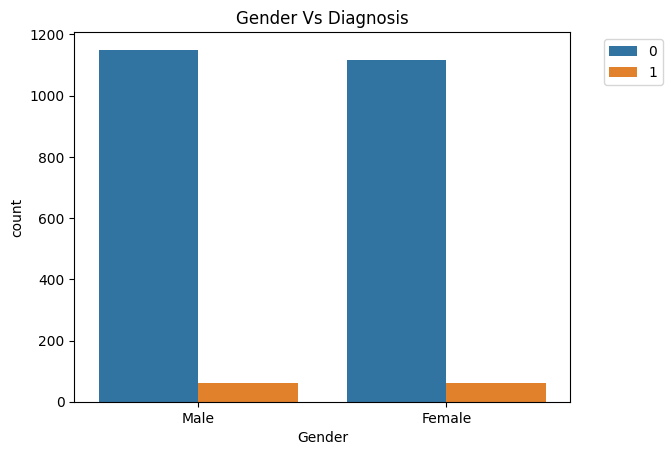

In [18]:
# Both male and females are likely to suffer attacks
sns.countplot(data=df, x='Gender', hue ='Diagnosis')
plt.title('Gender Vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.show()

In [19]:
pd.DataFrame(df.groupby(['Gender','Diagnosis'])['Diagnosis'].count())

Diagnosis
Gender Diagnosis           
Female 0               1118
       1                 62
Male   0               1150
       1                 62

In [20]:
df['Ethnicity'].unique()

array([1, 2, 0, 3], dtype=int64)

In [21]:
df['Ethnicity'] = df['Ethnicity'].map({0:'Caucasian', 1:'African American', 2:'Asian', 3:'Other'})

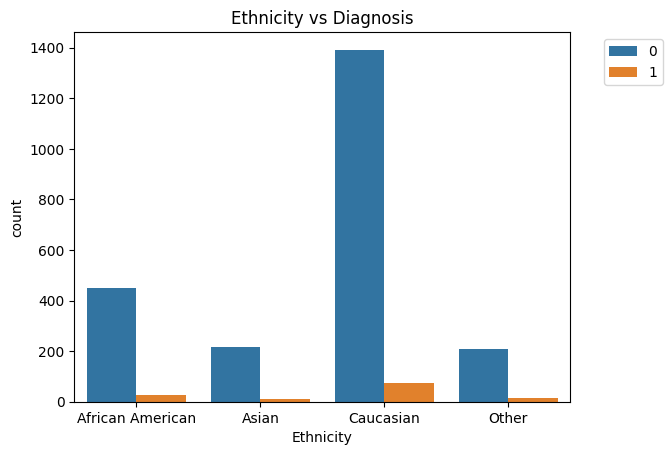

In [22]:
# Caucasians are more likely to suffer from Asthma attacks
sns.countplot(data=df, x='Ethnicity', hue='Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Ethnicity vs Diagnosis')
plt.show()

In [23]:
# to remove unimportant variables not useful for analysis
df = df.drop(['PatientID','DoctorInCharge'], axis=1)

In [24]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,Male,African American,None,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,Female,Asian,Bachelors,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,Male,Asian,High_School,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,Female,Asian,High_School,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,Male,Caucasian,Higher_edu,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


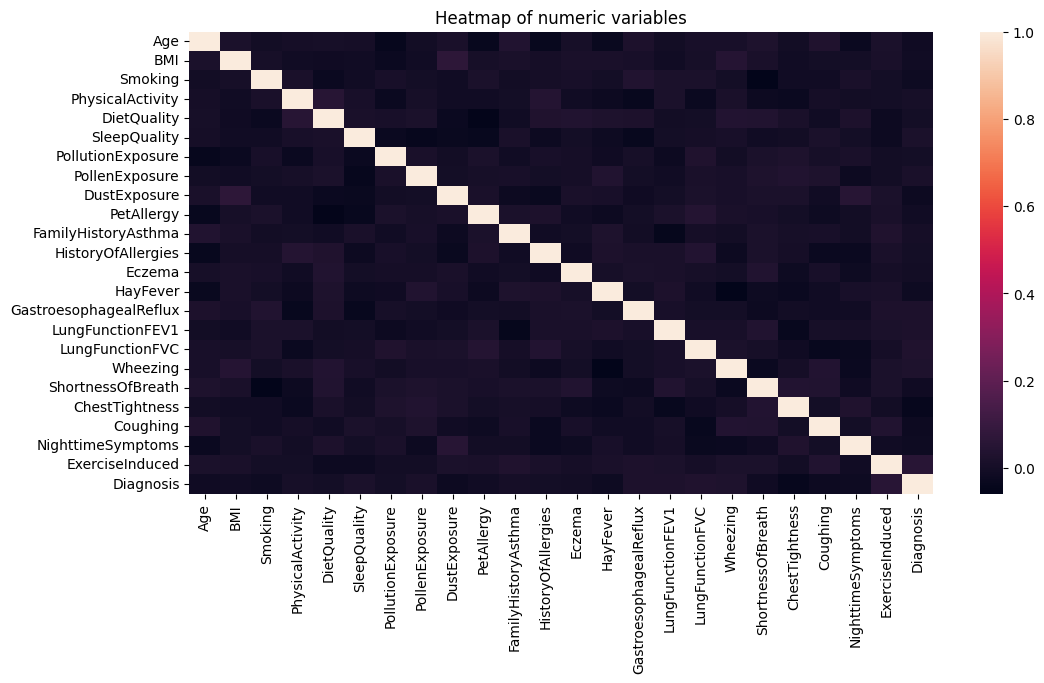

In [25]:
# to visualise correlation of all numeric values in a heatmap
plt.figure(figsize=(12,6), dpi=100)
sns.heatmap(data= df.select_dtypes(['int','float']).corr())
plt.title('Heatmap of numeric variables')
plt.show()

In [26]:
# to define X and y
X = df.drop('Diagnosis', axis=1)

In [27]:
# to convert categorical variable into dummy variable, drop_first = True to remove multi-collinearity
X = pd.get_dummies(X, drop_first = True)

In [28]:
y = df['Diagnosis']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# to make the dataset into equivalent scale
from sklearn.preprocessing import StandardScaler

In [31]:
# to assign 20% as testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)

In [32]:
# to scale the dataset
scaler = StandardScaler()

In [33]:
scaled_X_train = scaler.fit_transform(X_train)

In [34]:
# to transform on the X testing data
scaled_X_test = scaler.transform(X_test)

In [35]:
# to do oversampling via SMOTE as target variable is imbalanced
from imblearn.over_sampling import SMOTE

In [36]:
print("Number of transactions y_train dataset:", y_train.shape)
print("Number of transactions y_test dataset:", y_test.shape)

Number of transactions y_train dataset: (1913,)
Number of transactions y_test dataset: (479,)


In [37]:
# to Oversample 'Diagnosis' as it is imbalanced
print("Before OverSampling, counts of labels '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}\n".format(sum(y_train==0)))

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}\n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of labels '1': 97
Before OverSampling, counts of label '0': 1816

After OverSampling, the shape of train_X: (3632, 30)
After OverSampling, the shape of train_y: (3632,)

After OverSampling, counts of label '1': 1816
After OverSampling, counts of label '0': 1816


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [40]:
from xgboost import XGBClassifier

In [41]:
# to build a decision tree prediction model
dt = DecisionTreeClassifier()

In [42]:
# to fit the decision tree model onto X and y training set
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [43]:
# to predict on the X testing set
dt_pred = dt.predict(scaled_X_test)

In [44]:
# to print first 10 prediction from Decision tree classifier model
dt_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [46]:
# to get model prediction on the training data
dt_train_pred = dt.predict(X_train_res)

In [47]:
dt_train_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
# to compute the confusion matrix for training set, actual & predicted
cm = confusion_matrix(y_train_res,dt_train_pred, normalize='true')
cm

array([[1., 0.],
       [0., 1.]])

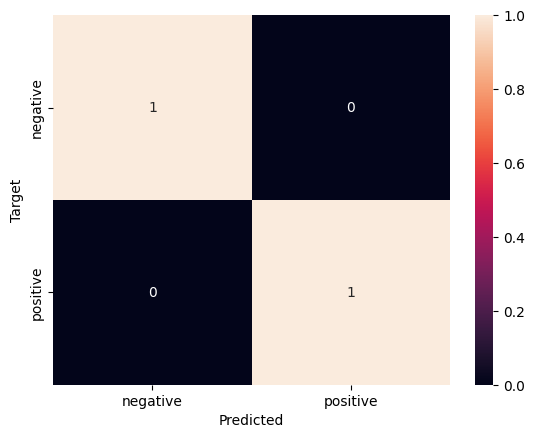

In [49]:
# To plot the confusion matrix for the Training Set
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)
plt.show()

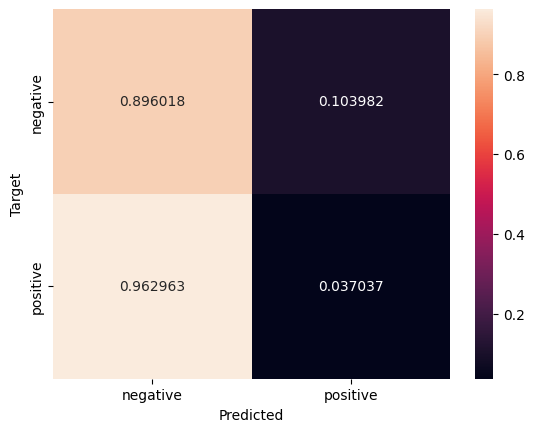

In [50]:
# to plot the confusion matrix for the Decision Tree testing set
# Accuracy rate for True Negative cases (DT) = 91.92%
# Accuracy rate for True positive (DT) = 7.407%
DT_test = confusion_matrix(y_test,dt_pred, normalize='true')
plot_cm(DT_test)
plt.show()

In [51]:
# From the confusion matrix, we can tell that the dataset is highly imbalanced. Thus AUC and F1 score needs to be computed
print("DT Train  AUC:", roc_auc_score(y_train_res,dt_train_pred)) 
print("DT Test AUC:", roc_auc_score(y_test,dt_pred))

DT Train  AUC: 1.0
DT Test AUC: 0.4665273680760406


In [52]:
# AUC for Decision tree classifier = 49.5%

In [53]:
# to print F1 score for Decision Tree actual Train and Predicted set
print("DT train F1:", f1_score(y_train_res, dt_train_pred))
print("DT test F1:", f1_score(y_test, dt_pred))

DT train F1: 1.0
DT test F1: 0.02666666666666667


In [54]:
print(classification_report(y_test,dt_pred)) # Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       452
           1       0.02      0.04      0.03        27

    accuracy                           0.85       479
   macro avg       0.48      0.47      0.47       479
weighted avg       0.89      0.85      0.87       479



In [55]:
# to build an instance of a Random Forest prediction model
rf = RandomForestClassifier()

In [56]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [57]:
# to predict on the scaled X test set
rf_pred = rf.predict(scaled_X_test)

In [58]:
# to print Ist 10 prediction on Random Forest model
rf_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
# to get model's prediction on Random Forest training set
rf_train_pred = dt.predict(X_train_res)

In [60]:
rf_train_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [61]:
# to compute the confusion matrix for Random forest training set, actual & predicted
rf_cm = confusion_matrix(y_train_res, rf_train_pred, normalize='true')
rf_cm

array([[1., 0.],
       [0., 1.]])

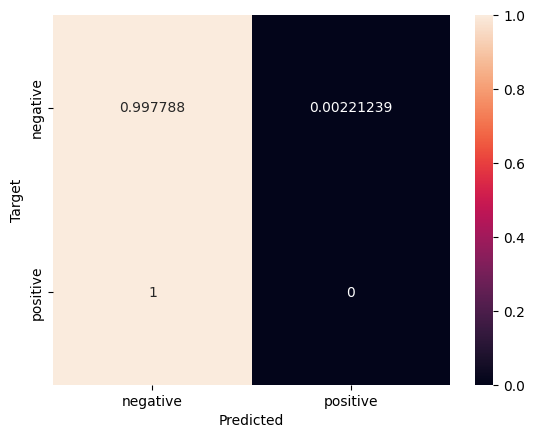

In [62]:
# to plot confusion matrix for Random Forest testing set
# accuracy rate for True Negative (RF) = 99.77%, the model is overfitted
# accuracy rate for True positive = 0%
RF_test = confusion_matrix(y_test, rf_pred, normalize='true')
plot_cm(RF_test)
plt.show()

In [63]:
# To compute the AUC score and F1 for Random Forest model
print("RF train AUC:", roc_auc_score(y_train_res, rf_train_pred))
print("RF test AUC: ", roc_auc_score(y_test, rf_pred))

RF train AUC: 1.0
RF test AUC:  0.49889380530973454


In [64]:
# AUC for Random Forest test model = 49.88%

In [65]:
print("RF Train F1:", f1_score(y_train_res, rf_train_pred))
print("RF test F1:", f1_score(y_test, rf_pred))

RF Train F1: 1.0
RF test F1: 0.0


In [66]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.48       479
weighted avg       0.89      0.94      0.92       479



In [67]:
# to build the AdaBoost classifier model
ada = AdaBoostClassifier()

In [68]:
# to fit the AdaBoost prediction model
ada.fit(X_train_res, y_train_res)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [69]:
# to predict on the X testing data
ada_pred = ada.predict(scaled_X_test)

In [70]:
ada_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
# to predict on X training set, AdaBoost model
ada_train_pred = ada.predict(X_train_res)

In [72]:
ada_train_pred 

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [73]:
# to compute the confusion matrix for AdaBoost classifier train set, actual and predicted
ada_cm = confusion_matrix(y_train_res,ada_train_pred, normalize='true')
ada_cm

array([[0.969163 , 0.030837 ],
       [0.0660793, 0.9339207]])

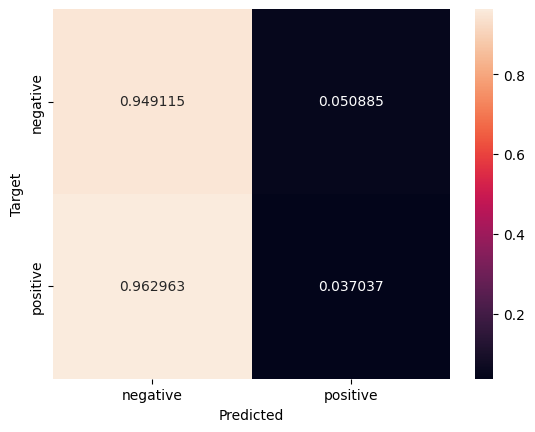

In [74]:
# AdaBoost confusion matrix Testing set
# Accuracy rate True Negative (Asthma) = 97.12%
# Accuracy rate True positive = 3.7%
ada_test = confusion_matrix(y_test, ada_pred, normalize='true')
plot_cm(ada_test)
plt.show()

In [75]:
# to compute the AUC and F1 score for AdaBoost model
print("AdaBoost train AUC:", roc_auc_score(y_train_res, ada_train_pred))
print("AdaBoost test AUC:", roc_auc_score(y_test, ada_pred))

AdaBoost train AUC: 0.9515418502202643
AdaBoost test AUC: 0.4930760406424123


In [76]:
# AUC for AdaBoost classifier 50.41%

In [77]:
print("Ada Train F1:", f1_score(y_train_res, ada_train_pred))
print("Ada Test F1:", f1_score(y_test, ada_pred))

Ada Train F1: 0.9506726457399103
Ada Test F1: 0.0392156862745098


In [78]:
print(classification_report(y_test, ada_pred)) # AdaBoost classifier

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       452
           1       0.04      0.04      0.04        27

    accuracy                           0.90       479
   macro avg       0.49      0.49      0.49       479
weighted avg       0.89      0.90      0.89       479



In [79]:
# to build a Gradient Boost classifier model
gb = GradientBoostingClassifier()

In [80]:
# to fit the Gradient Boost onto the training model
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [81]:
# to predict on the X test set
gb_pred = gb.predict(scaled_X_test)

In [82]:
gb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
# to predict on the X training set
gb_train_pred = gb.predict(X_train_res)

In [84]:
gb_train_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [85]:
# to compute the AUC and F1 score for the Gradient Boost model
print("GB train AUC:", roc_auc_score(y_train_res, gb_train_pred))
print("GB test AUC:", roc_auc_score(y_test, gb_pred))

GB train AUC: 0.9757709251101322
GB test AUC: 0.497787610619469


In [86]:
# AUC for Gradient Boost classifier = 49.88%

In [87]:
print(classification_report(y_test, gb_pred)) # Gradient Boost classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.48       479
weighted avg       0.89      0.94      0.91       479



In [88]:
# to build an instance of XGBoost classifier prediction model
xg = XGBClassifier()

In [89]:
# to fit the XGBoost classifier model onto the training data
xg.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
# to predict on the X testing data
xg_pred = xg.predict(scaled_X_test)

In [91]:
xg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
# to return model prediction for XGBoost training set
xg_train_pred = xg.predict(X_train_res)

In [93]:
xg_train_pred

array([0, 0, 0, ..., 1, 1, 1])

In [94]:
# XGboost confusion matrix on training data
xg_cm = confusion_matrix(y_train_res, xg_train_pred, normalize='true')
xg_cm

array([[1., 0.],
       [0., 1.]])

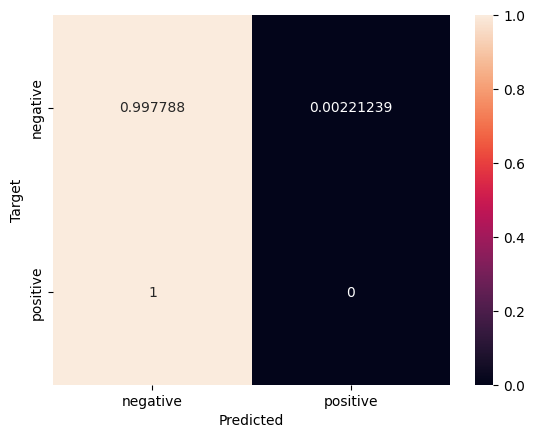

In [95]:
# XGBoost confusion matrix on testing data
# accuracy rate for True negative (Asthma) = 100% data is overfitted
XG_test = confusion_matrix(y_test, xg_pred, normalize='true')
plot_cm(XG_test)
plt.show()

In [96]:
# to compute the AUC and F1 score for XGBoost classifier model
print("XG train AUC:", roc_auc_score(y_train_res, xg_train_pred))
print("XG test AUC:", roc_auc_score(y_test, xg_pred))

XG train AUC: 1.0
XG test AUC: 0.49889380530973454


In [97]:
# AUC for XGBoost classifier = 50%

In [98]:
print("XG train F1:", f1_score(y_train_res, xg_train_pred))
print("XG test F1:", f1_score(y_test, xg_pred))

XG train F1: 1.0
XG test F1: 0.0


In [99]:
print(classification_report(y_test, xg_pred)) # XGBoost classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.48       479
weighted avg       0.89      0.94      0.92       479



In [100]:
# AdaBoost classifier has the highest AUC score for the testing set: 50.41%
# AdaBoost has the highest precision at 0.07 for its TP asthma cases

In [101]:
# to select AdaBoost classifier model
ada.feature_importances_

array([0.  , 0.02, 0.02, 0.04, 0.02, 0.02, 0.  , 0.04, 0.  , 0.04, 0.08,
       0.  , 0.04, 0.04, 0.  , 0.02, 0.02, 0.08, 0.06, 0.12, 0.1 , 0.06,
       0.04, 0.08, 0.  , 0.  , 0.  , 0.04, 0.02, 0.  ])

In [102]:
# to print all column names
X.columns

Index(['Age', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure',
       'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema',
       'HayFever', 'GastroesophagealReflux', 'LungFunctionFEV1',
       'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness',
       'Coughing', 'NighttimeSymptoms', 'ExerciseInduced', 'Gender_Male',
       'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Ethnicity_Other',
       'EducationLevel_High_School', 'EducationLevel_Higher_edu',
       'EducationLevel_None'],
      dtype='object')

In [103]:
pd.DataFrame(data= ada.feature_importances_, index=X.columns, columns = ['Importance']).sort_values('Importance', ascending=False)

,Importance
ChestTightness,0.12
Coughing,0.10
Gender_Male,0.08
FamilyHistoryAsthma,0.08
Wheezing,0.08
NighttimeSymptoms,0.06
ShortnessOfBreath,0.06
ExerciseInduced,0.04
HayFever,0.04
Eczema,0.04


In [104]:
# to read into a new dataframe
ada_imp = pd.DataFrame(data= ada.feature_importances_, index=X.columns, columns = ['Importance']).sort_values('Importance', ascending=False)

C:\Users\miche\AppData\Local\Temp\ipykernel_14868\3429397864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ada_imp, x='Importance', y=ada_imp.index, palette="Spectral")


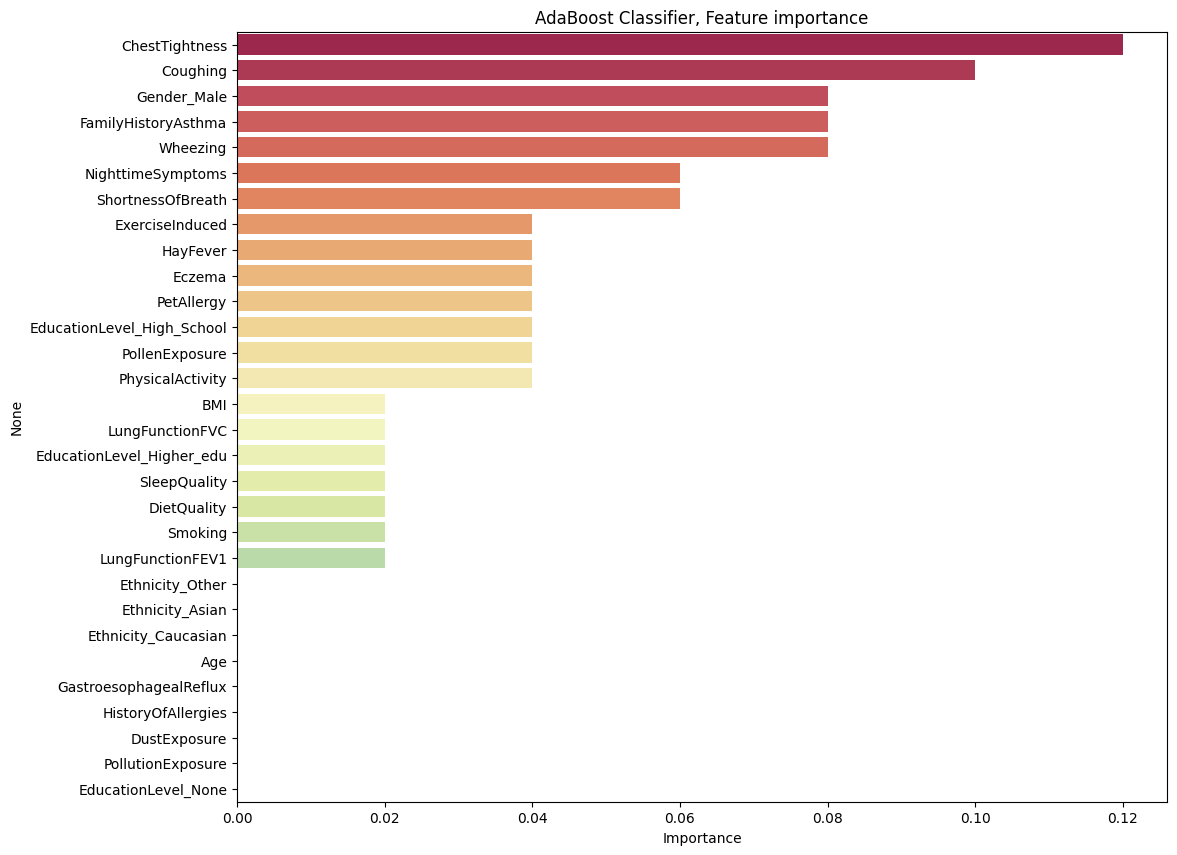

In [224]:
plt.figure(figsize=(12,10), dpi=100)
sns.barplot(data=ada_imp, x='Importance', y=ada_imp.index, palette="Spectral")
plt.title("AdaBoost Classifier, Feature importance", fontsize=12)
plt.show()